In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('Titanic-Dataset.csv')

In [103]:
df.info()
print("\n")
print(df.describe())
print("\n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592  

In [104]:
print("\nDescriptive Statistics:")
print(df.describe())



Descriptive Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [105]:
print("\nMissing Values:")
print(df.isnull().sum()) 


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [106]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [107]:
df['Fare'] = np.log1p(df['Fare'])

In [108]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [109]:
numerical_features = ['Age', 'Fare']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [110]:
df_original = df.copy()

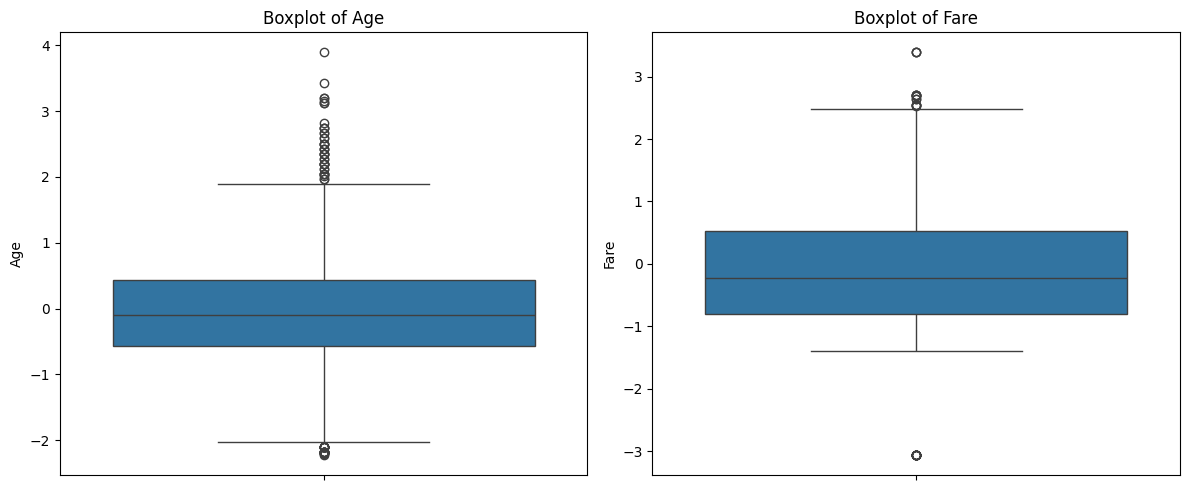

In [111]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_original['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_original['Fare'])
plt.title('Boxplot of Fare')

plt.tight_layout()
plt.show()

In [118]:
def handle_outliers(data, columns):
    clean_data = data.copy()
    for column in columns:
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        clean_data[column] = clean_data[column].clip(lower=lower_bound, upper=upper_bound)
    return clean_data

df = handle_outliers(df, ['Age', 'Fare'])

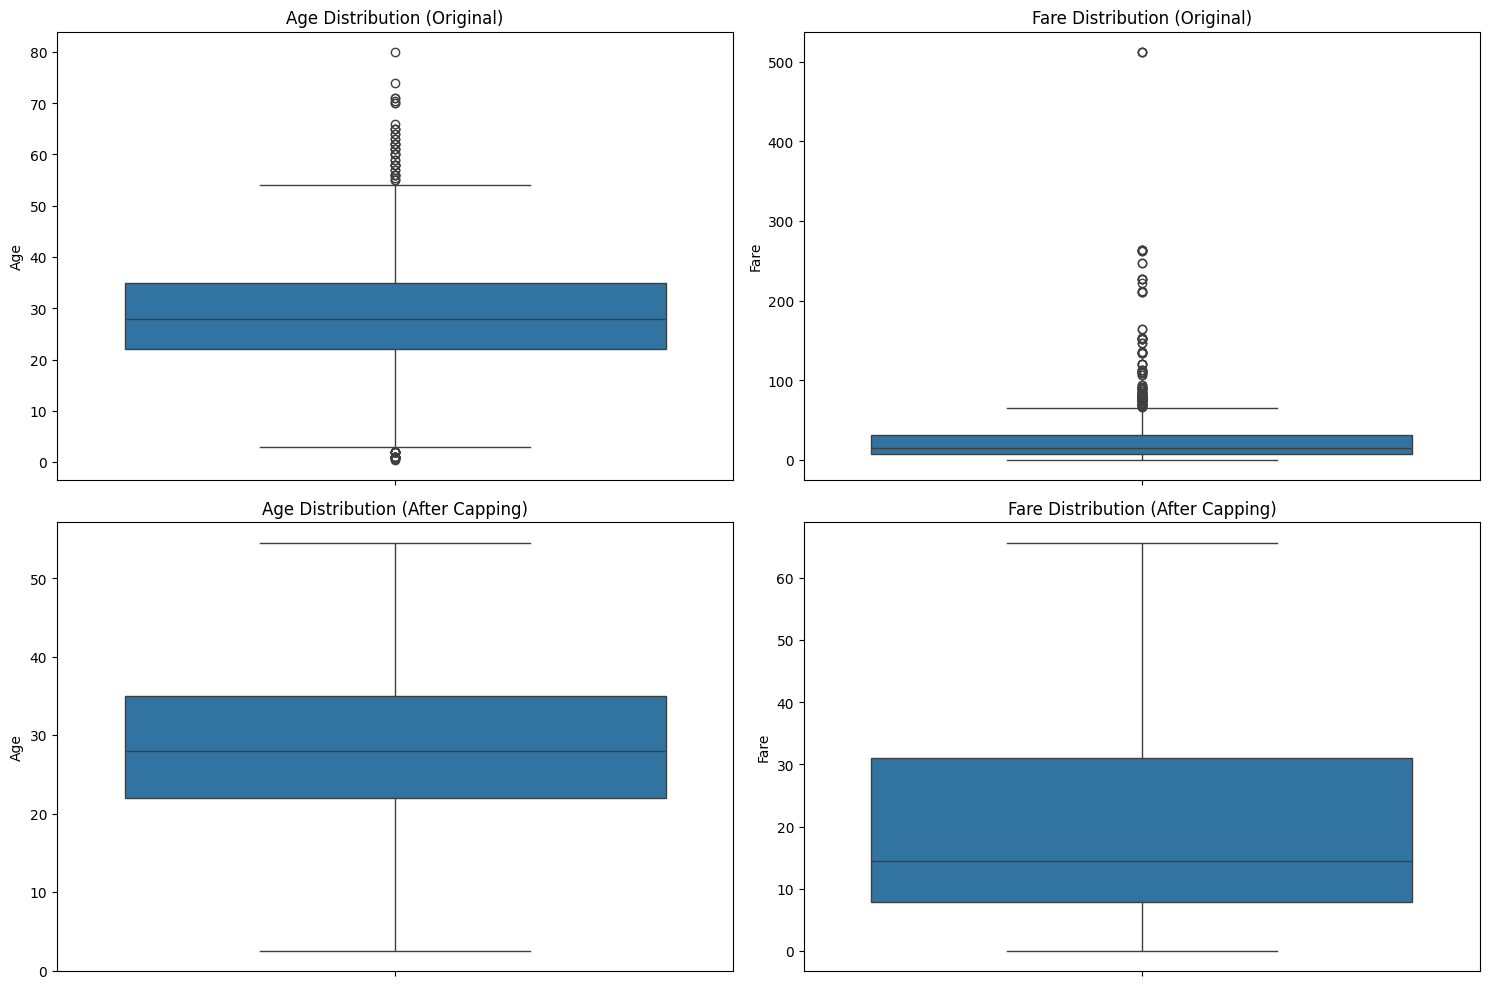


Detailed Statistics:

Age Statistics:
Before - Min: 0.42, Max: 80.00
After  - Min: 2.50, Max: 54.50

Fare Statistics:
Before - Min: 0.00, Max: 512.33
After  - Min: 0.00, Max: 65.63

Data Retention: 100.0% of original data


In [113]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(y=df_with_outliers['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Original)')

sns.boxplot(y=df_with_outliers['Fare'], ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution (Original)')

sns.boxplot(y=df_no_outliers['Age'], ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution (After Capping)')

sns.boxplot(y=df_no_outliers['Fare'], ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution (After Capping)')

plt.tight_layout()
plt.show()

print("\nDetailed Statistics:")
print("\nAge Statistics:")
print(f"Before - Min: {df_with_outliers['Age'].min():.2f}, Max: {df_with_outliers['Age'].max():.2f}")
print(f"After  - Min: {df_no_outliers['Age'].min():.2f}, Max: {df_no_outliers['Age'].max():.2f}")

print("\nFare Statistics:")
print(f"Before - Min: {df_with_outliers['Fare'].min():.2f}, Max: {df_with_outliers['Fare'].max():.2f}")
print(f"After  - Min: {df_no_outliers['Fare'].min():.2f}, Max: {df_no_outliers['Fare'].max():.2f}")

retention_rate = (len(df_no_outliers) / len(df_with_outliers)) * 100
print(f"\nData Retention: {retention_rate:.1f}% of original data")